In [4]:
import os 
import sys
import pandas as pd
import numpy as np
import csv
import seaborn as sns #visualisation
from IPython.display import display
import matplotlib.pyplot as plt #visualisation
from scipy.stats import pointbiserialr
%matplotlib inline
sns.set(color_codes=True)

#define directory do only once
os.getcwd() 
#os.chdir('WiDS Datathon')

'/Users/yue.yu@ibm.com/Jupyter Notebooks/WiDS Datathon'

In [5]:
#open file and put in data frame
pd.set_option('display.max_columns', None)
data = pd.read_csv('training_v2.csv')

# rows, columns
data.shape

(91713, 186)

In [6]:
#display the top 5 rows
data.head(5)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [7]:
#checking if there are any repeat patientts or encounter ids
duplicate_patient_id = data[data.duplicated(['patient_id'])]

duplicate_enc_id = data[data.duplicated(['encounter_id'])]

print('number of duplicated pateints: ', duplicate_patient_id.shape)
print('number of duplicated encounters: ', duplicate_enc_id.shape)



number of duplicated pateints:  (0, 186)
number of duplicated encounters:  (0, 186)



null columns: 0 


 hospital_death
0    83798
1     7915
dtype: int64 



,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,Other Hospital,Other Hospital,114,admit,CCU-CTICU,0.009028,0,NaN,2.7,116.0,103.01,0,0.0,0.2,15.0,1.16,1.0,4.0,6.0,0.0,5.0,380.0,82.0,37.9,0.0,66.0,60.0,60.0,92.0,7.14,14.0,142.0,36.9,NaN,1.0,24.70,64.0,52.0,65.0,59.0,65.0,59.0,82.0,82.0,72.0,66.0,93.0,71.0,93.0,71.0,24.0,19.0,97.0,97.0,94.0,72.0,104.0,98.0,104.0,98.0,36.9,36.9,64.0,52.0,65.0,59.0,65.0,59.0,82.0,82.0,72.0,66.0,93.0,71.0,93.0,71.0,24.0,19.0,97.0,97.0,94.0,72.0,104.0,98.0,104.0,98.0,36.9,36.9,2.7,2.7,0.2,0.2,15.0,15.0,7.3,7.3,1.16,1.16,365.0,288.0,23.0,23.0,12.3,12.3,37.9,37.9,1.200,1.200,5.9,5.9,226.0,226.00,5.2,5.2,142.0,142.0,24.70,24.70,2.7,2.7,0.2,0.2,15.0,15.0,7.3,7.3,1.16,1.16,365.0,365.0,23.0,23.0,12.3,12.3,37.9,37.9,1.200,1.200,5.9,5.9,226.0,226.0,5.2,5.2,142.0,142.0,24.70,24.7000,60.0,33.0,7.62,6.99,256.0,92.0,92.0,92.000000,60.0,60.0,7.14,7.14,92.0,92.0,92.0,92.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
25,29208,114628

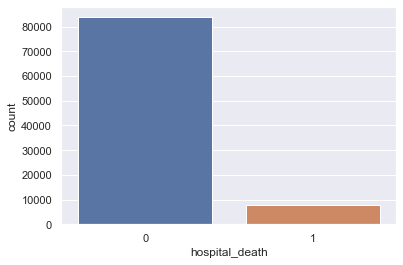

In [8]:
#hospital death data evaluation

# Finding the null values 
print('\nnull columns:', data['hospital_death'].isnull().sum(),'\n')

# Find values = 1 (death)
print('\n',data.groupby('hospital_death').size(),'\n')

display(sns.countplot(x=data['hospital_death']))

#create dataframe called death_data with only patients that has died
death_data = data.copy()
indexDeath = death_data[death_data['hospital_death'] == 0].index
death_data.drop(indexDeath, inplace=True)

display(death_data)




All Data: 



count    87485.000000
mean        62.309516
std         16.775119
min         16.000000
25%         52.000000
50%         65.000000
75%         75.000000
max         89.000000
Name: age, dtype: float64


Only Death Data: 



count    7273.000000
mean       68.494156
std        14.428363
min        16.000000
25%        60.000000
50%        71.000000
75%        80.000000
max        89.000000
Name: age, dtype: float64


Dataframe Correlation Value between death and age:  0.11101673815609261

null columns: 4228 



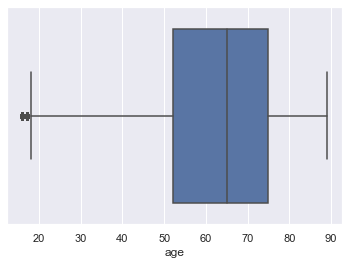

In [9]:
#age data evaluation
print('All Data: \n')
display(data['age'].describe())

print('\nOnly Death Data: \n')
display(death_data['age'].describe())


#finding correlation between death and age
print('\nDataframe Correlation Value between death and age: ',data['hospital_death'].corr(data['age']))


# Finding the null values.
print('\nnull columns:', data['age'].isnull().sum(),'\n')

#boxplot of age distribution
display(sns.boxplot(x=data['age']))

#display(sns.boxplot(x=death_data['age']))


Dataframe Correlation Value between death and icu_id:  0.0009943251406371266

Point biserial correlation of death and icu_id:  PointbiserialrResult(correlation=0.0009943251406371346, pvalue=0.7633238063834908) 



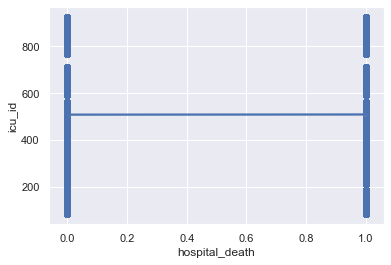

In [10]:
#is icu_id important? 

#correlate icu_id to death 
print('Dataframe Correlation Value between death and icu_id: ',data['hospital_death'].corr(data['icu_id']))

#point biserial correlation for continuous variable vs categorical
pbc = pointbiserialr(data['hospital_death'], data['icu_id'])
print('\nPoint biserial correlation of death and icu_id: ',pbc, '\n')

sns.regplot(x=data['hospital_death'],y = data['icu_id'])

In [11]:
#count number of null values for each column
null_row_cnts = data.isnull().sum(axis = 0).sort_values()

#look at columns where more than half of the rows are null
print('\nMore than half of rows are null:\n', null_row_cnts[null_row_cnts > 45857].to_string())

#look at columns where more than 75% of rows are null
print('\nMore than 75% of rows are null:\n',null_row_cnts[null_row_cnts > 68784].to_string())


#look at columns where more than 90% of rows are null
print('\nMore than 90% of rows are null:\n',null_row_cnts[null_row_cnts > 82542].to_string())




More than half of rows are null:
 urineoutput_apache        48998
d1_albumin_min            49096
d1_albumin_max            49096
h1_glucose_max            52614
h1_glucose_min            52614
d1_bilirubin_min          53673
d1_bilirubin_max          53673
albumin_apache            54379
d1_inr_min                57941
h1_inr_max                57941
h1_inr_min                57941
d1_inr_max                57941
bilirubin_apache          58134
d1_arterial_po2_max       59262
d1_arterial_po2_min       59262
d1_arterial_pco2_min      59271
d1_arterial_pco2_max      59271
d1_arterial_ph_min        60123
d1_arterial_ph_max        60123
d1_pao2fio2ratio_max      66008
d1_pao2fio2ratio_min      66008
d1_mbp_invasive_min       67777
d1_mbp_invasive_max       67777
d1_sysbp_invasive_min     67959
d1_sysbp_invasive_max     67959
d1_diasbp_invasive_max    67984
d1_diasbp_invasive_min    67984
d1_lactate_max            68396
d1_lactate_min            68396
paco2_apache              70868
fio2_

In [12]:
#count number of null values for each row (note the number on the left is the index number of the patient in data)
null_columns_cnts = data.isnull().sum(axis = 1).sort_values()d

#look at rows where more than 75% of the columns are null
print('\nMore than 75% of columns are null:\n', null_columns_cnts[null_columns_cnts > 140].to_string())

#look at rows where more than 90% of the columns are null
print('\nMore than 90% of columns are null:\n', null_columns_cnts[null_columns_cnts > 167].to_string())

print (data.shape)


More than 75% of columns are null:
 62968    141
44486    141
75873    141
18394    141
1892     142
32211    142
13864    142
36031    143
36063    143
35201    143
35517    144
63904    144
63837    146
91242    146
35453    146
85125    147
14703    147
18432    147
17574    147
80780    147
34889    148
43253    148
64706    148
20340    148
36007    149
14126    150
31709    150
34602    151
82656    151
43775    152
13059    152
34288    154
33524    154
18868    154
29950    154
30326    154
20351    155
13717    155
13913    155
10486    155
37376    155
30485    156
18952    156
33310    156
21161    156
24967    156
35608    157
12563    158
35421    158
13063    158
90275    160
33104    168
3011     169

More than 90% of columns are null:
 33104    168
3011     169


In [24]:
# drop rows with more than 90% of columns null 
data_nonull=data.drop(null_columns_cnts[null_columns_cnts > 167])

# View columns and rows in the data_nonull (originally (91713, 186))
data_nonull.shape


(91711, 186)

In [45]:
#Fill only categorical columns Nas with "UNKNOWN" (namely gender, hospital admit source, icu_admit_source, icu_stay_type, icu_type, apache bodysystem)

data_nonull=data_nonull.select_dtypes(include=['object']).fillna('Unknown')

data_nonull
#print (null_row_cnts[null_row_cnts > 1 ] )

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,Unknown,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...,...
91708,Caucasian,M,Acute Care/Floor,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Emergency Department,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [48]:
# check for nulls in data for the previous "categorical" columns and if they were filled with Unknown in data_nonull. 
print('\nDistinct Value Counts for data: \n', data['gender'].value_counts(),'\n')
print('\nDistinct Value Counts for data_nonull: \n', data_nonull['gender'].value_counts(),'\n')





Distinct Value Counts for data: 
 M    49469
F    42219
Name: gender, dtype: int64 


Distinct Value Counts for data_nonull: 
 M          49467
F          42219
Unknown       25
Name: gender, dtype: int64 

